In [1]:
import matador
from matador.plotting import plot_spectral
import os
%matplotlib inline
import pathlib

In [2]:
os.chdir(pathlib.Path(matador.__file__).parent.joinpath('../examples/run3_phonons'))

First, we can plot the phonon data directly from the output files:

Using config from /u/fs1/me388/.matadorrc
Displaying plot...


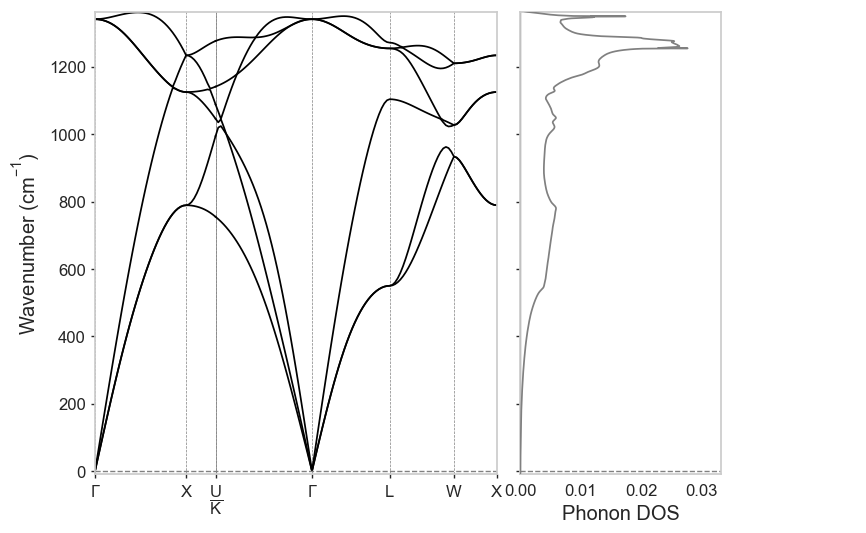

In [28]:
plot_spectral('completed/C-OQMD_675640-CollCode28857', phonons=True, band_reorder=False, band_colour='black')

Using config from /u/fs1/me388/.matadorrc
Reordering bands based on local gradients...
Displaying plot...


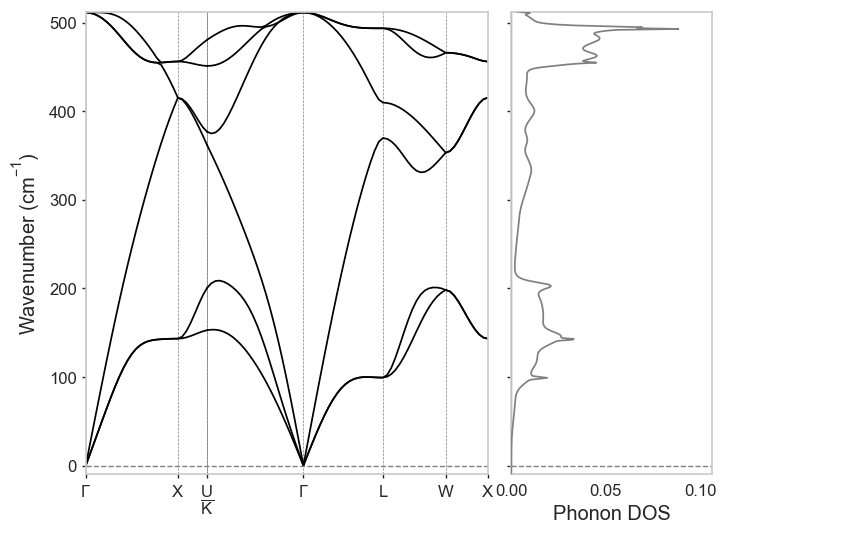

In [29]:
plot_spectral('completed/Si-OQMD_5714-CollCode29287', phonons=True, band_colour='black')

For extra features, we can load the data into the models `VibrationalDOS` and `VibrationalDispersion`, which allows us to investigate free energies.

In [5]:
from matador.scrapers import phonon2dict, phonon_dos2dict 

Using config from /u/fs1/me388/.matadorrc
Reordering bands based on local gradients...
Displaying plot...


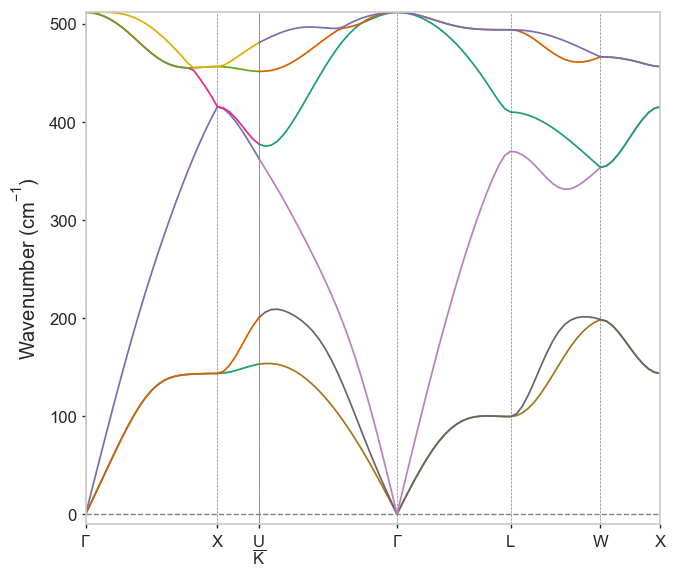

In [21]:
# first, lets plot the dispersion again
Si_model, _ = phonon2dict('completed/Si-OQMD_5714-CollCode29287.phonon', as_model=True)
Si_model.plot_dispersion()

In [22]:
# now, we can load the DOS and plot it.
Si_dos_model, _ = phonon_dos2dict('completed/Si-OQMD_5714-CollCode29287.phonon_dos', as_model=True)

Using config from /u/fs1/me388/.matadorrc
Displaying plot...


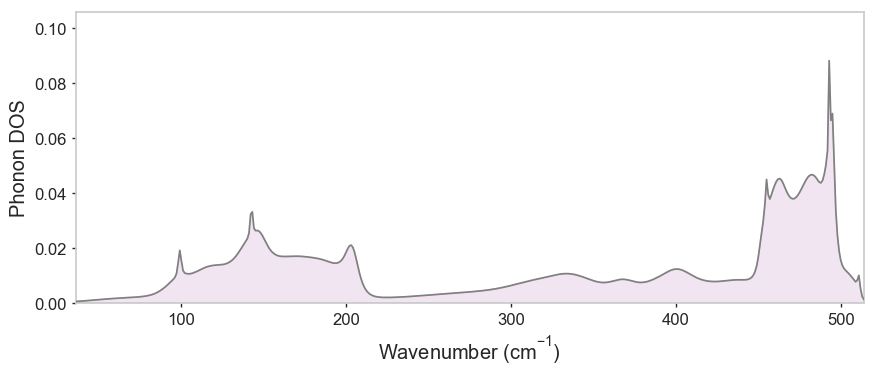

In [23]:
Si_dos_model.plot_dos()

Using config from /u/fs1/me388/.matadorrc


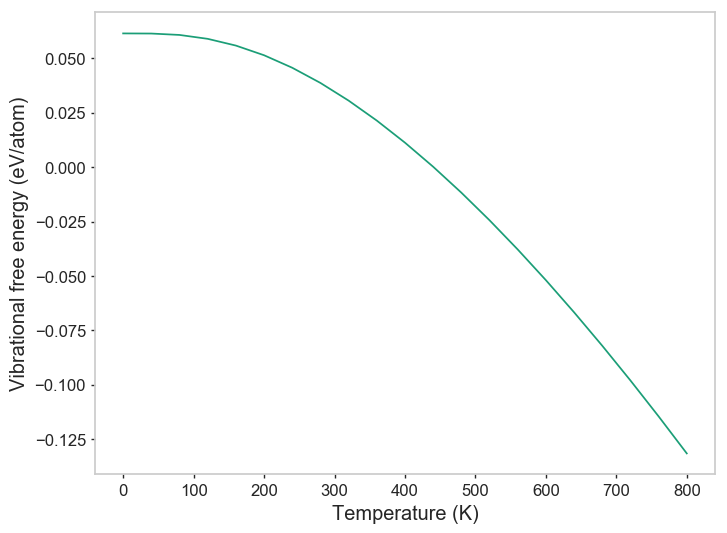

In [24]:
# we can also compute and plot the free energy G(T) from the frequencies computed on the DOS grid
Si_dos_model.plot_free_energy()

In [25]:
# we can also compare all these results with the corresponding results for diamond carbon
C_model, _ = phonon2dict('completed/C-OQMD_675640-CollCode28857.phonon', as_model=True)
C_dos_model, _ = phonon_dos2dict('completed/C-OQMD_675640-CollCode28857.phonon_dos', as_model=True)

Using config from /u/fs1/me388/.matadorrc
Disabling projections as mutiple seeds requested.
Reordering bands based on local gradients...
Reordering bands based on local gradients...
Displaying plot...


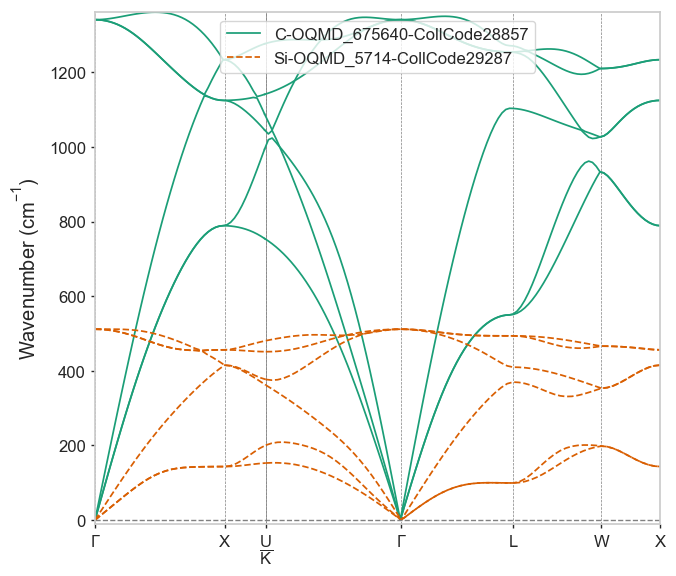

In [26]:
from matador.plotting import plot_spectral
plot_spectral([C_model, Si_model], phonons=True, plot_dos=False)

Using config from /u/fs1/me388/.matadorrc
Using config from /u/fs1/me388/.matadorrc


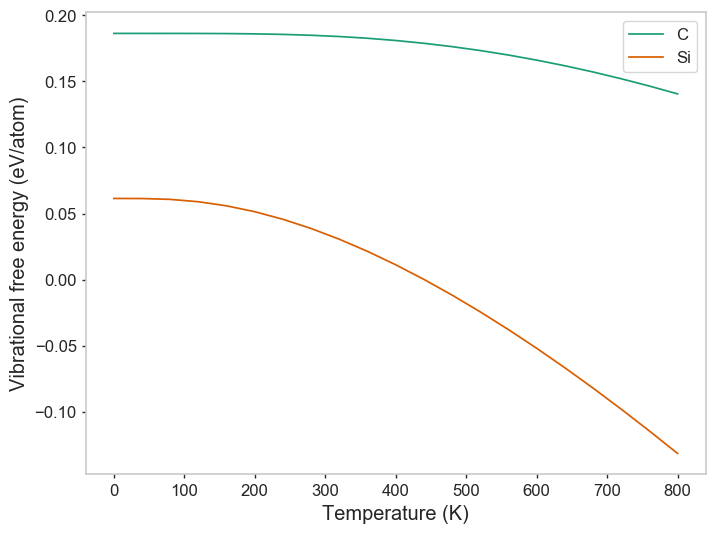

In [27]:
ax = C_dos_model.plot_free_energy(line_kwargs=dict(label='C'))
ax = Si_dos_model.plot_free_energy(ax=ax, line_kwargs=dict(label='Si'))